In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
import io

In [ ]:
data = pd.read_csv('/content/BTC-USD (1).csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-01,963.658020,1003.080017,958.698975,998.325012,998.325012,147775008
1,2017-01-02,998.617004,1031.390015,996.702026,1021.750000,1021.750000,222184992
2,2017-01-03,1021.599976,1044.079956,1021.599976,1043.839966,1043.839966,185168000
3,2017-01-04,1044.400024,1159.420044,1044.400024,1154.729980,1154.729980,344945984
4,2017-01-05,1156.729980,1191.099976,910.416992,1013.380005,1013.380005,510199008


In [ ]:
print(len(data))

1095


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1095 non-null   object 
 1   Open       1095 non-null   float64
 2   High       1095 non-null   float64
 3   Low        1095 non-null   float64
 4   Close      1095 non-null   float64
 5   Adj Close  1095 non-null   float64
 6   Volume     1095 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.0+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1.095000e+03
mean,6318.960661,6494.191274,6128.352866,6324.526286,6324.526286,8.392303e+09
std,3536.880823,3672.468084,3365.004800,3533.289777,3533.289777,7.972091e+09
min,775.177979,823.307007,755.755981,777.757019,777.757019,6.085170e+07
25%,3671.477905,3750.828980,3619.565674,3672.519898,3672.519898,2.219500e+09
50%,6478.890137,6567.540039,6373.370117,6480.379883,6480.379883,5.302482e+09
75%,8430.655274,8640.493164,8200.300781,8432.879883,8432.879883,1.367737e+10
max,19475.800781,20089.000000,18974.099609,19497.400391,19497.400391,4.510573e+10


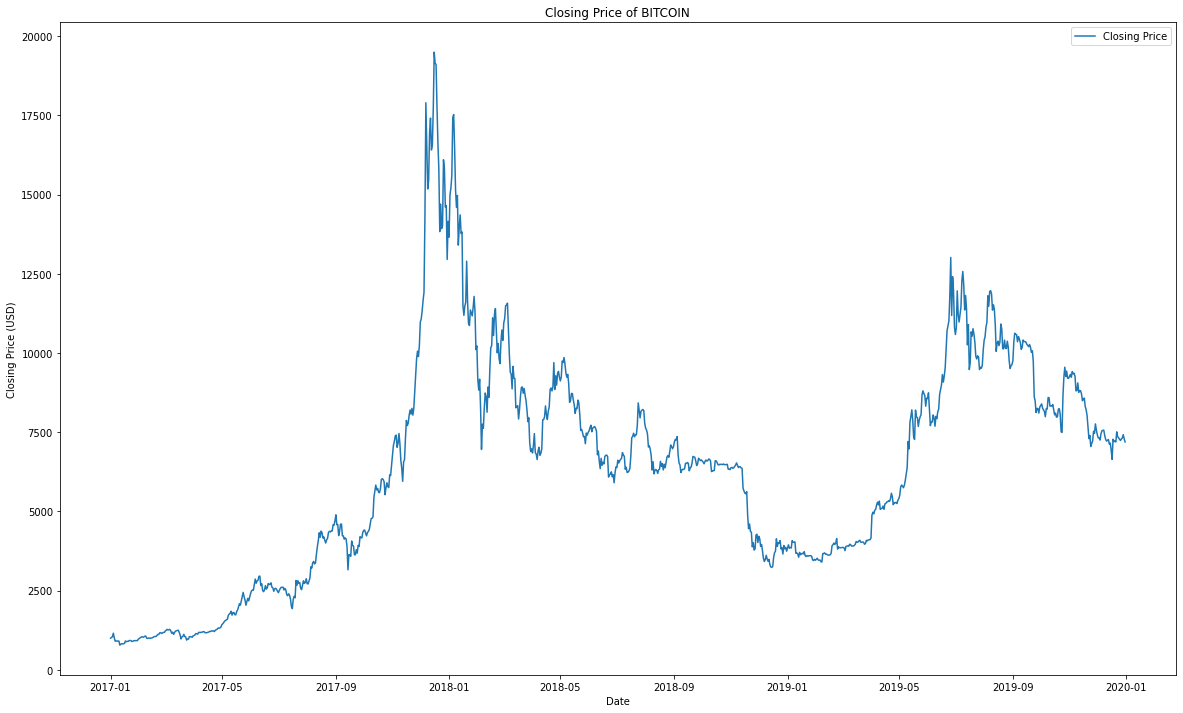

In [ ]:
data['Date'] = pd.to_datetime(data.Date, format = '%Y-%m-%d')
data.index = data['Date']

plt.figure(figsize = (20,12))
plt.plot(data['Close'], label = 'Closing Price')
plt.title('Closing Price of BITCOIN')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
#plt.savefig('1.png')
#files.download('1.png')

In [ ]:
temp = {'Algorithm':[],
        'Performance':[]
       }
  
performance_scores = pd.DataFrame(temp)

# Technique 1 : Linear Regression

In [ ]:
temp = data.sort_index(ascending = True, axis = 0)
lr_data = pd.DataFrame(index = range(0, len(data)), columns = ['Date', 'Close'])

for i in range(0, len(temp)):
    lr_data['Date'][i] = temp['Date'][i]
    lr_data['Close'][i] = temp['Close'][i]

In [ ]:
from fastai.tabular import add_datepart
add_datepart(lr_data, 'Date')
lr_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())
/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:64: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df[prefix + 'Elapsed'] = field.astype(np.int64) // 10 ** 9


In [ ]:
lr_data['mon_fri'] = 0
for i in range(0, len(lr_data)):
    if (lr_data['Dayofweek'][i] == 0 or lr_data['Dayofweek'][i] == 4):
        lr_data['mon_fri'][i] = 1
    else:
        lr_data['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
training = lr_data[:780]
validation = lr_data[780:]

x_training = training.drop('Close', axis = 1)
y_training = training['Close']
x_validation = validation.drop('Close', axis = 1)
y_validation = validation['Close']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_training, y_training)

LinearRegression()

In [ ]:
predictions = model.predict(x_validation)
rms = np.sqrt(np.mean(np.power((np.array(y_validation)-np.array(predictions)),2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['Linear Regression', rms]


RMSE (Validation set):
2227.3953705453955


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


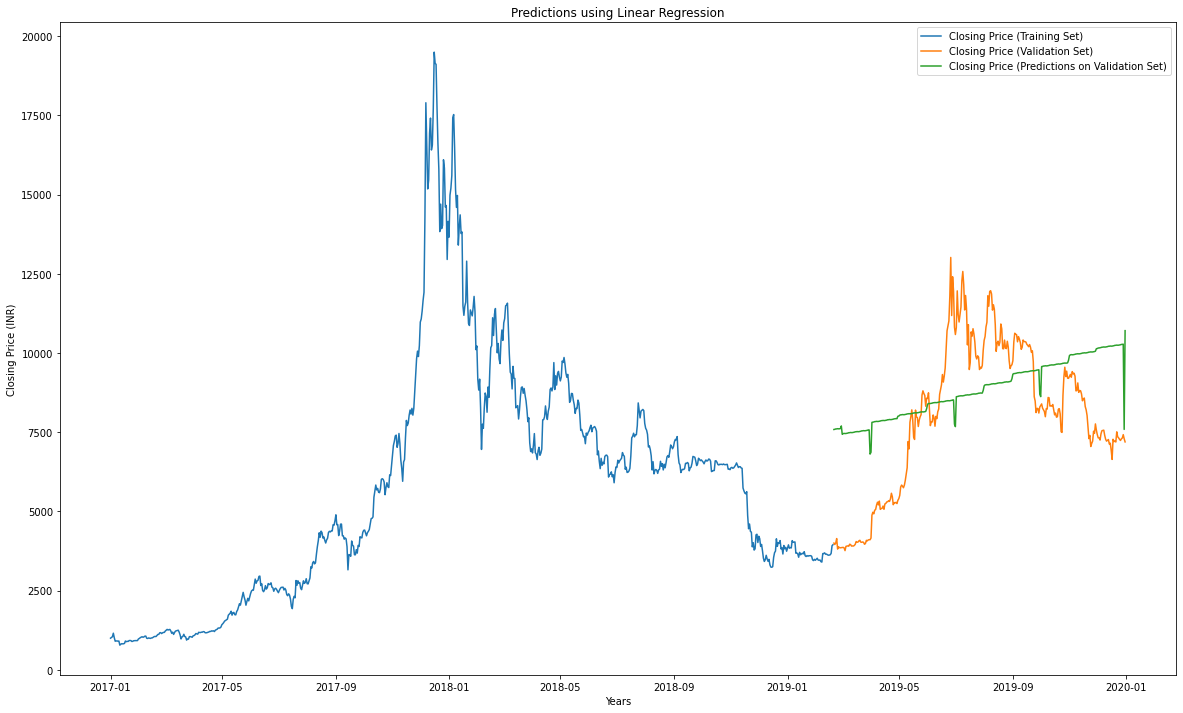

In [ ]:
training.index = data['Date'][:780]
validation.index = data['Date'][780:]

validation['Predictions'] = 0
validation['Predictions'] = predictions

plt.figure(figsize = (20,12))
plt.plot(training['Close'], label = 'Closing Price (Training Set)')
plt.plot(validation['Close'], label = 'Closing Price (Validation Set)')
plt.plot(validation['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using Linear Regression')
plt.xlabel('Years')
plt.ylabel('Closing Price (INR)')
plt.legend()
plt.show()
#plt.savefig('3.png')
#files.download('3.png')

# Technique 2 : K-Nearest Neighbours (KNN)

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
x_training_scaled = scaler.fit_transform(x_training)
x_training = pd.DataFrame(x_training_scaled)
x_validation_scaled = scaler.fit_transform(x_validation)
x_validation = pd.DataFrame(x_validation_scaled)

parameters = {'n_neighbors' : [2,3,4,5,6,7,8,9]}
KNN = neighbors.KNeighborsRegressor()
model = GridSearchCV(KNN, parameters, cv = 5)

model.fit(x_training, y_training)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [ ]:
predictions = model.predict(x_validation)
rms = np.sqrt(np.mean(np.power((np.array(y_validation)-np.array(predictions)), 2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['k-Nearest Neighbours', rms]


RMSE (Validation set):
5407.714989432722


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


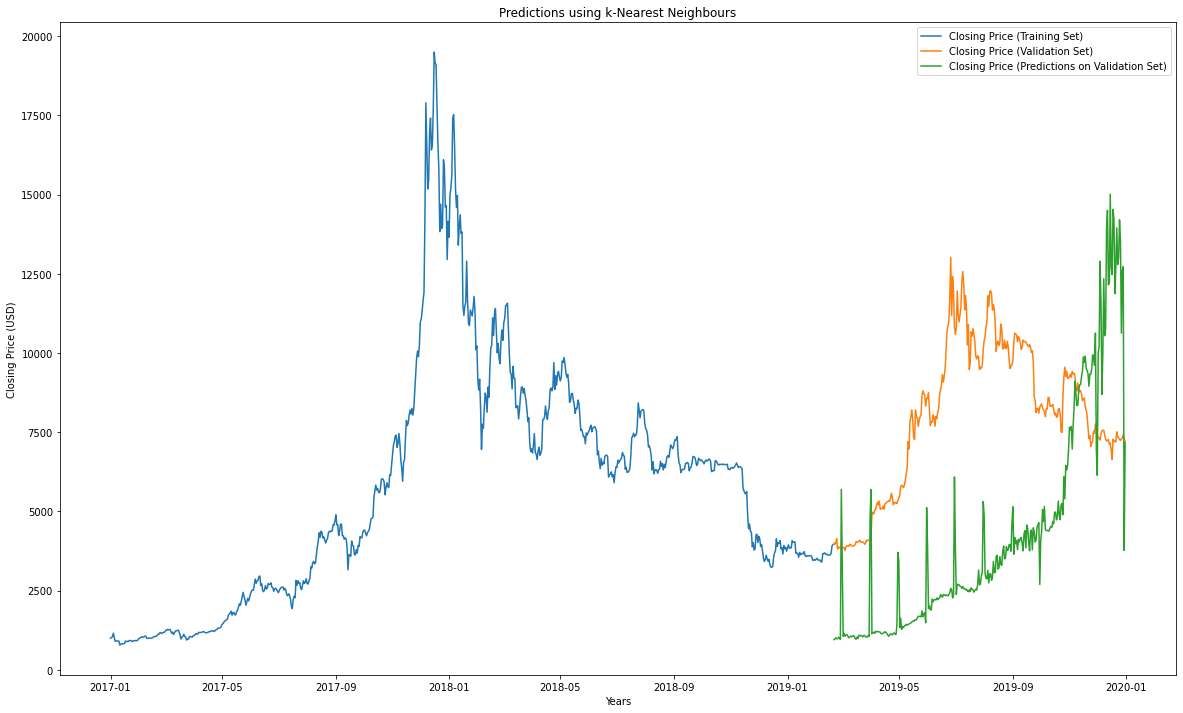

In [ ]:
validation['Predictions'] = 0
validation['Predictions'] = predictions

training.index = data['Date'][:780]
validation.index = data['Date'][780:]

plt.figure(figsize = (20,12))
plt.plot(training['Close'], label = 'Closing Price (Training Set)')
plt.plot(validation['Close'], label = 'Closing Price (Validation Set)')
plt.plot(validation['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using k-Nearest Neighbours')
plt.xlabel('Years')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
#plt.savefig('4.png')
#files.download('4.png')

# Technique 3 : Prophet

In [ ]:
from fbprophet import Prophet

prophet_data = pd.DataFrame(index = range(0, len(data)), columns = ['Date', 'Close'])

for i in range(0, len(data)):
    prophet_data['Date'][i] = data['Date'][i]
    prophet_data['Close'][i] = data['Close'][i]

prophet_data['Date'] = pd.to_datetime(prophet_data.Date, format = '%Y-%m-%d')
prophet_data.index = prophet_data['Date']

prophet_data.rename(columns = {'Close': 'y', 'Date': 'ds'}, inplace = True)

training = prophet_data[:780]
validation = prophet_data[780:]

model = Prophet()
model.fit(training)

closing_prices = model.make_future_dataframe(periods = len(validation))
forecast = model.predict(closing_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_validation = forecast['yhat'][780:]
rms = np.sqrt(np.mean(np.power((np.array(validation['y'])-np.array(forecast_validation)), 2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['Prophet', rms]


RMSE (Validation set):
15710.553482147667


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


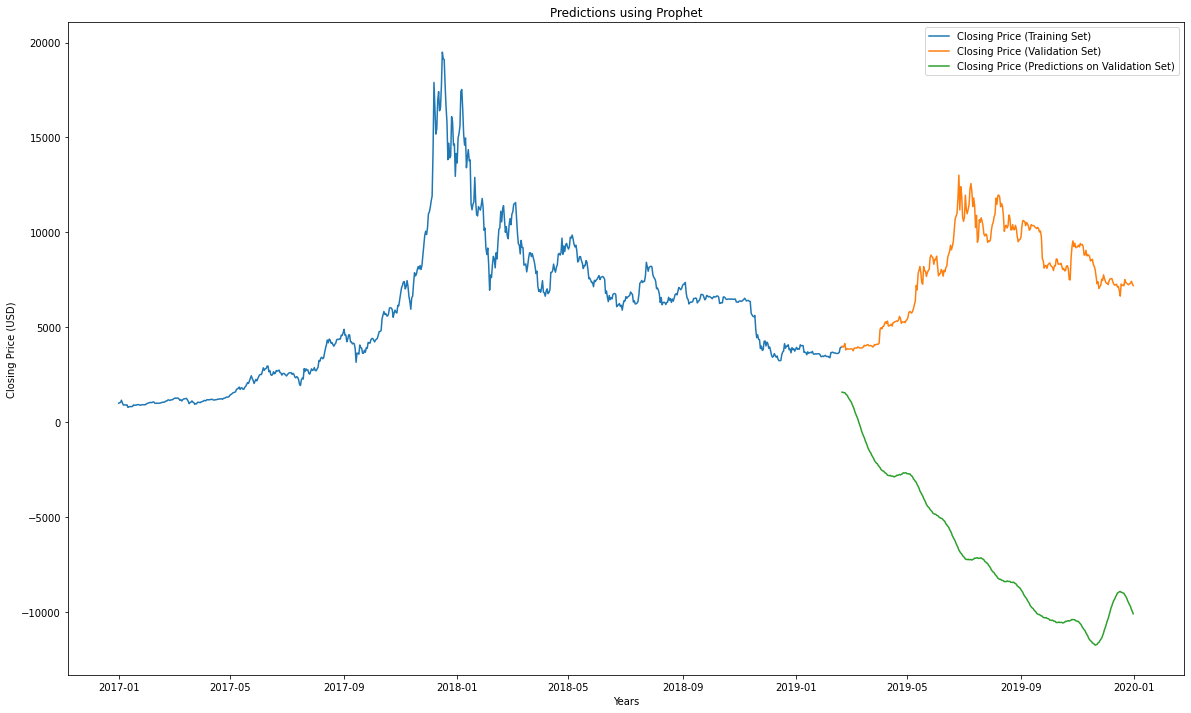

In [ ]:
validation['Predictions'] = 0
validation['Predictions'] = forecast_validation.values

plt.figure(figsize = (20,12))
plt.plot(training['y'], label = 'Closing Price (Training Set)')
plt.plot(validation['y'], label = 'Closing Price (Validation Set)')
plt.plot(validation['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using Prophet')
plt.xlabel('Years')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
#plt.savefig('6.png')
#files.download('6.png')

# Technique 4 : Long Short Term Memory (LSTM)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

temp = data.sort_index(ascending = True, axis = 0)
lstm_data = pd.DataFrame(index = range(0, len(data)), columns = ['Date', 'Close'])
for i in range(0, len(data)):
    lstm_data['Date'][i] = temp['Date'][i]
    lstm_data['Close'][i] = temp['Close'][i]

lstm_data.index = lstm_data.Date
lstm_data.drop('Date', axis = 1, inplace = True)

dataset = lstm_data.values
training = dataset[0:780,:]
validation = dataset[780:,:]

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_dataset = scaler.fit_transform(dataset)

x_training, y_training = [], []
for i in range(60, len(training)):
    x_training.append(scaled_dataset[i-60:i, 0])
    y_training.append(scaled_dataset[i,0])
x_training, y_training = np.array(x_training), np.array(y_training)

x_training = np.reshape(x_training, (x_training.shape[0], x_training.shape[1], 1))

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_training.shape[1], 1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_training, y_training, epochs = 1, batch_size = 1, verbose = 2)

input = lstm_data[len(lstm_data) - len(validation) - 60:].values
input = input.reshape(-1,1)
input  = scaler.transform(input)

X_testing = []
for i in range(60, input.shape[0]):
    X_testing.append(input[i-60:i, 0])
X_testing = np.array(X_testing)

X_testing = np.reshape(X_testing, (X_testing.shape[0], X_testing.shape[1], 1))
closing_price = model.predict(X_testing)
closing_price = scaler.inverse_transform(closing_price)

720/720 - 21s - loss: 0.0038 - 21s/epoch - 29ms/step


In [ ]:
rms = np.sqrt(np.mean(np.power((validation - closing_price), 2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['Long Short Term Memory', rms]


RMSE (Validation set):
607.2450560351866


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


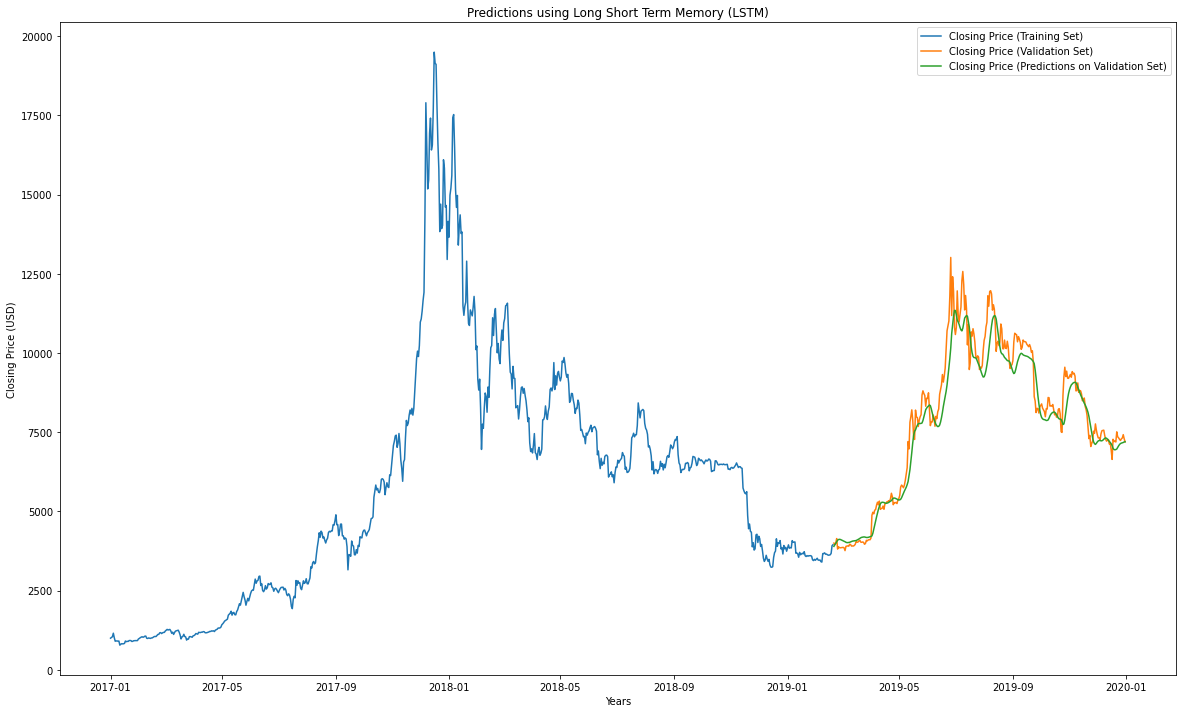

In [ ]:
plt.figure(figsize = (20,12))
training = lstm_data[:780]
validation = lstm_data[780:]
validation['Predictions'] = closing_price

plt.plot(training['Close'], label = 'Closing Price (Training Set)')
plt.plot(validation['Close'], label = 'Closing Price (Validation Set)')
plt.plot(validation['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using Long Short Term Memory (LSTM)')
plt.xlabel('Years')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
#plt.savefig('7.png')
#files.download('7.png')

# **Evaluating Performance using Root Mean Squared Error Values**
## **To test the goodness-of-fit of models.**

In [ ]:
performance_scores

,Algorithm,Performance
0,Linear Regression,2227.395371
1,k-Nearest Neighbours,5407.714989
2,Prophet,15710.553482
3,Long Short Term Memory,607.245056


## **Thus, we can conclude that the algorithm - Long Short Term Memory (LSTM) performs the best on the given dataset; as there is a significant difference in the performance of the algorithms and LSTM has the lowest RMSE value out of all the algorithms.**